# Predicting the Fraud status of a transaction in a Fintech Companies

In this notebook, we're are going to build a machine learning classification model to predict whether a transaction is fraudulent or not fraudulent. 

## 1. Problem definition

> How well can we predict the fraud status of future transaction given the characteristics and previous examples of both past fradulent and non-fraudulent transaction?

## 2. Data

The data was privately obtained for an international fintech company with HQ in Delware.

The raw data consists of 2 main datasets:

* Users dataset
* Transactions dataset

The 2 main datasets were combined on the "userID" column and then sorted by the "FDR" type column.

The final output is the dataset that will be used for this project. 

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a transaction is fraudulent during the proof of concept, the company will be motivated to pursue and improve the project and deploy to production. 

## 4. Features

This is where you'll get different information about each of the features in the dataset.  

* username
* status
* kyc_status
* aml_status
* country
* mobile_phone_number_first_digits
* email_domain
* ibans
* referred_by
* count_of_ibans
* count_of_eids
* txn_no
* account_number
* type
* txn_amount
* after_ledger_balance
* response_message
* transaction_description
* transaction_category
* beneficiary_id
* beneficiary_currency
* customer_currency
* transferred_amount
* exchange_rate
* transaction_charges
* transaction_purpose
* transaction_destination
* create_year
* create_month
* create_day
* create_DoW
* last_update_year
* last_update_month
* last_update_day
* last_update_DoW
* dump_year
* dump_month
* dump_day
* dump_DoW
* target


## Preparing the tools

We're going to use pandas, Matplotlib, and NumPy for data analysis and manipulation. We'll also be using Scikit_learn for modelling

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import plot_roc_curve


## Loading the two datasets

In [3]:
# Import the users dataset and drop the unnamed:0 column
users = pd.read_csv("data/user_data.csv")
users.drop(['Unnamed: 0'], axis = 1, inplace = True)
users.head()

,username,status,create_date,last_update,kyc_status,aml_status,country,mobile_phone_number_first_digits,email_domain,ibans,referred_by,count_of_ibans,count_of_eids
0,7.092070e+11,ACTIVE,2020-11-20 01:57:38.358492+00:00,NaT,PENDING,NaN,Philippines,639206.0,gmail.com,NaN,22dbf423c0,NaN,NaN
1,7.052137e+10,ACTIVE,2020-10-26 10:56:28.140712+00:00,NaT,PENDING,NaN,United Arab Emirates,971521.0,hubpay.ae,NaN,d9ffaac817,NaN,NaN
2,7.050436e+10,ACTIVE,2020-11-19 07:34:15.333438+00:00,NaT,PENDING,NaN,United Arab Emirates,971504.0,gmail.com,NaN,14dcb77156,NaN,NaN
3,7.056788e+10,ACTIVE,2021-04-20 13:09:36.965792+00:00,NaT,PENDING,NaN,United Arab Emirates,971567.0,yahoo.com,NaN,d46b26dc4a,NaN,NaN
4,7.056449e+10,ACTIVE,2021-05-15 16:12:31.002288+00:00,2022-01-06 20:37:14.178931+00:00,PENDING,CHECKED,United Arab Emirates,971564.0,gmail.com,NaN,7f97da2b81,NaN,NaN


In [4]:
# Sort and display the data by count_of_ibans
users.sort_values(by=["count_of_ibans"], inplace=True, ascending=False)
users.head(5)

,username,status,create_date,last_update,kyc_status,aml_status,country,mobile_phone_number_first_digits,email_domain,ibans,referred_by,count_of_ibans,count_of_eids
40051,7.086010e+11,INACTIVE,2021-07-19 00:15:52.136985+00:00,2021-08-17 14:36:00.224561+00:00,VERIFIED,CHECKED,India,918600.0,gmail.com,AE140330000019100691950,a360ddaf83,18.0,39.0
45901,7.050197e+10,INACTIVE,2021-08-18 15:38:06.043992+00:00,2022-02-05 21:52:57.366395+00:00,PENDING,CHECKED,United Arab Emirates,971501.0,gmail.com,AE320330000019010114287,4b5231d8a8,18.0,2.0
76927,7.072590e+11,INACTIVE,2021-08-11 13:26:34.354337+00:00,2021-08-17 14:26:35.061886+00:00,VERIFIED,CHECKED,India,917259.0,gmail.com,AE140330000019100691950,2c5aac86ae,18.0,39.0
32597,7.091450e+11,INACTIVE,2021-08-17 16:01:38.973638+00:00,2021-08-18 05:59:35.653589+00:00,VERIFIED,CHECKED,India,919145.0,gmail.com,AE320330000019010114287,9398a95543,18.0,39.0
72989,7.054745e+10,INACTIVE,2021-08-17 13:10:36.361471+00:00,2021-08-26 08:25:32.501026+00:00,VERIFIED,CHECKED,United Arab Emirates,971547.0,gmail.com,AE320330000019010114287,07d14f3282,18.0,3.0


In [6]:
# Import the transaction dataset and drop the unnamed:0 column
trans = pd.read_csv("data/transactions_data.csv",
                   low_memory=False)
trans.drop(['Unnamed: 0'], axis = 1, inplace = True)
trans.head()

,username,txn_no,account_number,type,txn_amount,after_ledger_balance,dump_time,response_message,transaction_description,transaction_category,beneficiary_id,beneficiary_currency,customer_currency,transferred_amount,exchange_rate,transaction_charges,transaction_purpose,transaction_destination
0,7.056751e+10,7.35616E+18,8616013,FCR,10.0,10.0,2020-10-03 11:43:08.093621+00:00,SUCCESS,Wallet Topup,WALLETSERVICE,NaN,NaN,AED,NaN,NaN,NaN,NaN,NaN
1,7.056751e+10,5.95016E+18,8616013,FCR,10.0,20.0,2020-10-03 13:17:58.965080+00:00,SUCCESS,Wallet Topup,WALLETSERVICE,NaN,NaN,AED,NaN,NaN,NaN,NaN,NaN
2,7.056751e+10,4.47716E+18,8616013,FCR,50.0,70.0,2020-10-03 17:02:12.131722+00:00,SUCCESS,Wallet Topup,WALLETSERVICE,NaN,NaN,AED,NaN,NaN,NaN,NaN,NaN
3,7.056751e+10,3.39316E+18,8616013,FCR,10.0,30.0,2020-10-04 08:01:09.399342+00:00,SUCCESS,Wallet Topup,WALLETSERVICE,NaN,NaN,AED,NaN,NaN,NaN,NaN,NaN
4,7.050425e+10,6.45916E+18,792816013,FCR,10.0,10.0,2020-10-04 08:10:12.290569+00:00,SUCCESS,Wallet Topup,WALLETSERVICE,NaN,NaN,AED,NaN,NaN,NaN,NaN,NaN


## Merging both datasets together on "username"

In [7]:
from pandas.core.reshape.merge import merge

In [8]:
# Merge both datasets on "username"
users_trans = users.merge(trans, on='username')
users_trans.head()

,username,status,create_date,last_update,kyc_status,aml_status,country,mobile_phone_number_first_digits,email_domain,ibans,...,transaction_description,transaction_category,beneficiary_id,beneficiary_currency,customer_currency,transferred_amount,exchange_rate,transaction_charges,transaction_purpose,transaction_destination
0,7.086010e+11,INACTIVE,2021-07-19 00:15:52.136985+00:00,2021-08-17 14:36:00.224561+00:00,VERIFIED,CHECKED,India,918600.0,gmail.com,AE140330000019100691950,...,Family Maintenance,WALLETSERVICE,7.086010e+11,INR,AED,NaN,NaN,NaN,NaN,NaN
1,7.086010e+11,INACTIVE,2021-07-19 00:15:52.136985+00:00,2021-08-17 14:36:00.224561+00:00,VERIFIED,CHECKED,India,918600.0,gmail.com,AE140330000019100691950,...,1,BANKINGSERVICE,7.092730e+11,INR,INR,100.0,20.284976,0.0,Family Maintenance,IN
2,7.086010e+11,INACTIVE,2021-07-19 00:15:52.136985+00:00,2021-08-17 14:36:00.224561+00:00,VERIFIED,CHECKED,India,918600.0,gmail.com,AE140330000019100691950,...,Wallet Topup,WALLETSERVICE,NaN,NaN,INR,NaN,NaN,NaN,NaN,NaN
3,7.086010e+11,INACTIVE,2021-07-19 00:15:52.136985+00:00,2021-08-17 14:36:00.224561+00:00,VERIFIED,CHECKED,India,918600.0,gmail.com,AE140330000019100691950,...,1,BANKINGSERVICE,7.092100e+11,INR,INR,100.0,20.240093,0.0,Family Maintenance,IN
4,7.086010e+11,INACTIVE,2021-07-19 00:15:52.136985+00:00,2021-08-17 14:36:00.224561+00:00,VERIFIED,CHECKED,India,918600.0,gmail.com,AE320330000019010114287,...,Family Maintenance,WALLETSERVICE,7.086010e+11,INR,AED,NaN,NaN,NaN,NaN,NaN


In [10]:
users.shape

(131641, 13)

In [11]:
trans.shape

(576875, 18)

In [12]:
users_trans.shape

(698160, 30)

**Export the merged dataset**

In [13]:
# Export the users_trans dataset
users_trans.to_csv("data/users_trans_full.csv",
                  index=False)

**Import the merged dataset**

In [27]:
# Import the users_trans_full dataset
users_trans = pd.read_csv("data/users_trans_full.csv",
                         low_memory=False,
                         parse_dates=["dump_time"])
users_trans.head().T

,0,1,2,3,4
username,708601000000.0,708601000000.0,708601000000.0,708601000000.0,708601000000.0
status,INACTIVE,INACTIVE,INACTIVE,INACTIVE,INACTIVE
create_date,2021-07-19 00:15:52.136985+00:00,2021-07-19 00:15:52.136985+00:00,2021-07-19 00:15:52.136985+00:00,2021-07-19 00:15:52.136985+00:00,2021-07-19 00:15:52.136985+00:00
last_update,2021-08-17 14:36:00.224561+00:00,2021-08-17 14:36:00.224561+00:00,2021-08-17 14:36:00.224561+00:00,2021-08-17 14:36:00.224561+00:00,2021-08-17 14:36:00.224561+00:00
kyc_status,VERIFIED,VERIFIED,VERIFIED,VERIFIED,VERIFIED
aml_status,CHECKED,CHECKED,CHECKED,CHECKED,CHECKED
country,India,India,India,India,India
mobile_phone_number_first_digits,918600.0,918600.0,918600.0,918600.0,918600.0
email_domain,gmail.com,gmail.com,gmail.com,gmail.com,gmail.com
ibans,AE140330000019100691950,AE140330000019100691950,AE140330000019100691950,AE140330000019100691950,AE320330000019010114287


In [28]:
users_trans.shape

(698160, 30)

In [29]:
users_trans['type'].value_counts()

FDR    355225
FCR    342935
Name: type, dtype: int64

**Create the Dataframe we'll be working with**

In [43]:
# Create the Dataframe we'll be working with by sortin the type column that contains "FDR"
df = users_trans[users_trans['type'].str.contains('FDR')]
df.head().T

,1,3,5,7,9
username,708601000000.0,708601000000.0,708601000000.0,708601000000.0,708601000000.0
status,INACTIVE,INACTIVE,INACTIVE,INACTIVE,ACTIVE
create_date,2021-07-19 00:15:52.136985+00:00,2021-07-19 00:15:52.136985+00:00,2021-07-19 00:15:52.136985+00:00,2021-07-19 00:15:52.136985+00:00,2022-04-06 10:12:25.396352+00:00
last_update,2021-08-17 14:36:00.224561+00:00,2021-08-17 14:36:00.224561+00:00,2021-08-17 14:36:00.224561+00:00,2021-08-17 14:36:00.224561+00:00,NaT
kyc_status,VERIFIED,VERIFIED,VERIFIED,VERIFIED,PENDING
aml_status,CHECKED,CHECKED,CHECKED,CHECKED,NaN
country,India,India,India,India,India
mobile_phone_number_first_digits,918600.0,918600.0,918600.0,918600.0,918601.0
email_domain,gmail.com,gmail.com,gmail.com,gmail.com,gmail.com
ibans,AE140330000019100691950,AE140330000019100691950,AE320330000019010114287,AE320330000019010114287,NaN


**Export the df dataset**

In [44]:
# Export the df dataset
df.to_csv("data/df.csv",
                  index=False)

**Import the df dataset**

In [50]:
# Import the df dataset
df = pd.read_csv("data/df.csv",
                low_memory=False)
df.head().T

,0,1,2,3,4
username,708601000000.0,708601000000.0,708601000000.0,708601000000.0,708601000000.0
status,INACTIVE,INACTIVE,INACTIVE,INACTIVE,ACTIVE
create_date,2021-07-19 00:15:52.136985+00:00,2021-07-19 00:15:52.136985+00:00,2021-07-19 00:15:52.136985+00:00,2021-07-19 00:15:52.136985+00:00,2022-04-06 10:12:25.396352+00:00
last_update,2021-08-17 14:36:00.224561+00:00,2021-08-17 14:36:00.224561+00:00,2021-08-17 14:36:00.224561+00:00,2021-08-17 14:36:00.224561+00:00,NaT
kyc_status,VERIFIED,VERIFIED,VERIFIED,VERIFIED,PENDING
aml_status,CHECKED,CHECKED,CHECKED,CHECKED,NaN
country,India,India,India,India,India
mobile_phone_number_first_digits,918600.0,918600.0,918600.0,918600.0,918601.0
email_domain,gmail.com,gmail.com,gmail.com,gmail.com,gmail.com
ibans,AE140330000019100691950,AE140330000019100691950,AE320330000019010114287,AE320330000019010114287,NaN


### Apply the .dt.date to the dates columns

In [51]:
df['create_date'] = pd.to_datetime(df['create_date']).dt.date
df['last_update'] = pd.to_datetime(df['last_update']).dt.date
df['dump_time'] = pd.to_datetime(df['dump_time']).dt.date
df.head()

,username,status,create_date,last_update,kyc_status,aml_status,country,mobile_phone_number_first_digits,email_domain,ibans,...,transaction_description,transaction_category,beneficiary_id,beneficiary_currency,customer_currency,transferred_amount,exchange_rate,transaction_charges,transaction_purpose,transaction_destination
0,7.086010e+11,INACTIVE,2021-07-19,2021-08-17,VERIFIED,CHECKED,India,918600.0,gmail.com,AE140330000019100691950,...,1,BANKINGSERVICE,7.092730e+11,INR,INR,100.0,20.284976,0.0,Family Maintenance,IN
1,7.086010e+11,INACTIVE,2021-07-19,2021-08-17,VERIFIED,CHECKED,India,918600.0,gmail.com,AE140330000019100691950,...,1,BANKINGSERVICE,7.092100e+11,INR,INR,100.0,20.240093,0.0,Family Maintenance,IN
2,7.086010e+11,INACTIVE,2021-07-19,2021-08-17,VERIFIED,CHECKED,India,918600.0,gmail.com,AE320330000019010114287,...,1,BANKINGSERVICE,7.092730e+11,INR,INR,100.0,20.284976,0.0,Family Maintenance,IN
3,7.086010e+11,INACTIVE,2021-07-19,2021-08-17,VERIFIED,CHECKED,India,918600.0,gmail.com,AE320330000019010114287,...,1,BANKINGSERVICE,7.092100e+11,INR,INR,100.0,20.240093,0.0,Family Maintenance,IN
4,7.086010e+11,ACTIVE,2022-04-06,NaT,PENDING,NaN,India,918601.0,gmail.com,NaN,...,1,BANKINGSERVICE,7.092730e+11,INR,INR,100.0,20.284976,0.0,Family Maintenance,IN


### Convert to datetime and add datetime parameters for `create_date` `last_update` `dump_time` columns

In [52]:
# Convert to datatime dtype
df['create_date'] = df['create_date'].astype('datetime64[ns]')
df['last_update'] = df['last_update'].astype('datetime64[ns]')
df['dump_time'] = df['dump_time'].astype('datetime64[ns]')

In [53]:
# Create parameters for create_date
df["create_year"] = df.create_date.dt.year
df["create_month"] = df.create_date.dt.month
df["create_day"] = df.create_date.dt.day
df["create_DoW"] = df.create_date.dt.dayofweek

df["last_update_year"] = df.create_date.dt.year
df["last_update_month"] = df.create_date.dt.month
df["last_update_day"] = df.create_date.dt.day
df["last_update_DoW"] = df.create_date.dt.dayofweek

df["dump_year"] = df.create_date.dt.year
df["dump_month"] = df.create_date.dt.month
df["dump_day"] = df.create_date.dt.day
df["dump_DoW"] = df.create_date.dt.dayofweek

In [54]:
df

,username,status,create_date,last_update,kyc_status,aml_status,country,mobile_phone_number_first_digits,email_domain,ibans,...,create_day,create_DoW,last_update_year,last_update_month,last_update_day,last_update_DoW,dump_year,dump_month,dump_day,dump_DoW
0,7.086010e+11,INACTIVE,2021-07-19,2021-08-17,VERIFIED,CHECKED,India,918600.0,gmail.com,AE140330000019100691950,...,19,0,2021,7,19,0,2021,7,19,0
1,7.086010e+11,INACTIVE,2021-07-19,2021-08-17,VERIFIED,CHECKED,India,918600.0,gmail.com,AE140330000019100691950,...,19,0,2021,7,19,0,2021,7,19,0
2,7.086010e+11,INACTIVE,2021-07-19,2021-08-17,VERIFIED,CHECKED,India,918600.0,gmail.com,AE320330000019010114287,...,19,0,2021,7,19,0,2021,7,19,0
3,7.086010e+11,INACTIVE,2021-07-19,2021-08-17,VERIFIED,CHECKED,India,918600.0,gmail.com,AE320330000019010114287,...,19,0,2021,7,19,0,2021,7,19,0
4,7.086010e+11,ACTIVE,2022-04-06,NaT,PENDING,NaN,India,918601.0,gmail.com,NaN,...,6,2,2022,4,6,2,2022,4,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355220,7.052941e+10,ACTIVE,2020-11-10,2021-11-20,PENDING,CHECKED,United Arab Emirates,971529.0,adiq961.c2,NaN,...,10,1,2020,11,10,1,2020,11,10,1
355221,7.055560e+10,ACTIVE,2020-11-11,2020-11-11,VERIFIED,CHECKED,United Arab Emirates,971555.0,yahoo.com,NaN,...,11,2,2020,11,11,2,2020,11,11,2
355222,7.056556e+10,ACTIVE,2020-11-11,2020-11-11,VERIFIED,CHECKED,United Arab Emirates,971565.0,yahoo.com,NaN,...,11,2,2020,11,11,2,2020,11,11,2
355223,7.056292e+10,ACTIVE,2020-11-10,NaT,VERIFIED,CHECKED,United Arab Emirates,971562.0,gmail.com,NaN,...,10,1,2020,11,10,1,2020,11,10,1


### Sort DataFrame by dump_time

In [56]:
# Sort DataFrame in dump_time order
df.sort_values(by=["dump_time"], inplace=True, ascending=True)
df.head()

,username,status,create_date,last_update,kyc_status,aml_status,country,mobile_phone_number_first_digits,email_domain,ibans,...,create_day,create_DoW,last_update_year,last_update_month,last_update_day,last_update_DoW,dump_year,dump_month,dump_day,dump_DoW
351510,7.056751e+10,INACTIVE,2020-09-29,2022-04-13,VERIFIED,CHECKED,United Arab Emirates,971567.0,hubpay.ae,NaN,...,29,1,2020,9,29,1,2020,9,29,1
351511,7.056751e+10,INACTIVE,2020-09-29,2022-04-13,VERIFIED,CHECKED,United Arab Emirates,971567.0,hubpay.ae,NaN,...,29,1,2020,9,29,1,2020,9,29,1
351512,7.056751e+10,INACTIVE,2020-09-29,2022-04-13,VERIFIED,CHECKED,United Arab Emirates,971567.0,hubpay.ae,NaN,...,29,1,2020,9,29,1,2020,9,29,1
348408,7.055597e+10,ACTIVE,2020-10-17,2021-04-15,PENDING,CHECKED,United Arab Emirates,971555.0,hubpay.ae,NaN,...,17,5,2020,10,17,5,2020,10,17,5
351513,7.056751e+10,INACTIVE,2020-09-29,2022-04-13,VERIFIED,CHECKED,United Arab Emirates,971567.0,hubpay.ae,NaN,...,29,1,2020,9,29,1,2020,9,29,1


### Remove redundant datetime columns

In [57]:
# Now we can remove the following columns: "create_date", "last_update", "dump_time"
df.drop("create_date", axis=1, inplace=True)
df.drop("last_update", axis=1, inplace=True)
df.drop("dump_time", axis=1, inplace=True)

### Create the target label: Fraud and Non-Fraud columns

In [58]:
# Create an empty "target" column
df["target"] = ""

In [59]:
# Create the "target" column (if "count_of_ibans" or "count_of_eids" > 1; 
# assign as fraud 1. else, assign as non fraud, 0)

def target(row):
  if row['count_of_ibans'] > 1 or row['count_of_eids'] > 1:
    return 1
  else:
    return 0

df['target'] = df.apply(target, axis=1)
df.head()


,username,status,kyc_status,aml_status,country,mobile_phone_number_first_digits,email_domain,ibans,referred_by,count_of_ibans,...,create_DoW,last_update_year,last_update_month,last_update_day,last_update_DoW,dump_year,dump_month,dump_day,dump_DoW,target
351510,7.056751e+10,INACTIVE,VERIFIED,CHECKED,United Arab Emirates,971567.0,hubpay.ae,NaN,252d271228,NaN,...,1,2020,9,29,1,2020,9,29,1,1
351511,7.056751e+10,INACTIVE,VERIFIED,CHECKED,United Arab Emirates,971567.0,hubpay.ae,NaN,252d271228,NaN,...,1,2020,9,29,1,2020,9,29,1,1
351512,7.056751e+10,INACTIVE,VERIFIED,CHECKED,United Arab Emirates,971567.0,hubpay.ae,NaN,252d271228,NaN,...,1,2020,9,29,1,2020,9,29,1,1
348408,7.055597e+10,ACTIVE,PENDING,CHECKED,United Arab Emirates,971555.0,hubpay.ae,NaN,38a705d967,NaN,...,5,2020,10,17,5,2020,10,17,5,0
351513,7.056751e+10,INACTIVE,VERIFIED,CHECKED,United Arab Emirates,971567.0,hubpay.ae,NaN,252d271228,NaN,...,1,2020,9,29,1,2020,9,29,1,1


In [60]:
# Check for missing data
df.isna().sum()

username                                0
status                                  0
kyc_status                              0
aml_status                           8629
country                                 0
mobile_phone_number_first_digits        0
email_domain                            0
ibans                                9661
referred_by                            44
count_of_ibans                       9661
count_of_eids                       10030
txn_no                                  0
account_number                          0
type                                    0
txn_amount                              0
after_ledger_balance                    0
response_message                        3
transaction_description               365
transaction_category                    2
beneficiary_id                      40843
beneficiary_currency                40843
customer_currency                       2
transferred_amount                  44143
exchange_rate                     

In [61]:
# Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355225 entries, 351510 to 77359
Data columns (total 40 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   username                          355225 non-null  float64
 1   status                            355225 non-null  object 
 2   kyc_status                        355225 non-null  object 
 3   aml_status                        346596 non-null  object 
 4   country                           355225 non-null  object 
 5   mobile_phone_number_first_digits  355225 non-null  float64
 6   email_domain                      355225 non-null  object 
 7   ibans                             345564 non-null  object 
 8   referred_by                       355181 non-null  object 
 9   count_of_ibans                    345564 non-null  float64
 10  count_of_eids                     345195 non-null  float64
 11  txn_no                            355225 non-nul

Non-Fraud transaction: 243807
Fraud transaction : 111418



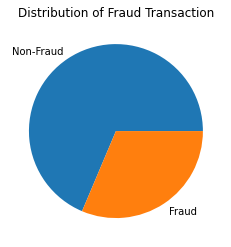

In [62]:
# Let's look at the proportion of the "target" classes
print("Non-Fraud transaction: " + str(len(df[df['target'] == 0])))
print("Fraud transaction : " + str(len(df[df['target'] == 1])))
print()

plt.pie(df['target'].value_counts(), labels=["Non-Fraud", "Fraud"])
plt.title('Distribution of Fraud Transaction')
plt.show()


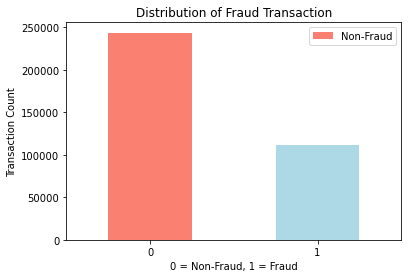

In [64]:
# Plot a graphical representation of the target class
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

plt.title("Distribution of Fraud Transaction") 
plt.xlabel("0 = Non-Fraud, 1 = Fraud") 
plt.ylabel("Transaction Count")
plt.legend(["Non-Fraud", "Fraud"])
plt.xticks(rotation=0);

In [67]:
df.head().T

,351510,351511,351512,348408,351513
username,70567507772.0,70567507772.0,70567507772.0,70555973178.0,70567507772.0
status,INACTIVE,INACTIVE,INACTIVE,ACTIVE,INACTIVE
kyc_status,VERIFIED,VERIFIED,VERIFIED,PENDING,VERIFIED
aml_status,CHECKED,CHECKED,CHECKED,CHECKED,CHECKED
country,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates
mobile_phone_number_first_digits,971567.0,971567.0,971567.0,971555.0,971567.0
email_domain,hubpay.ae,hubpay.ae,hubpay.ae,hubpay.ae,hubpay.ae
ibans,NaN,NaN,NaN,NaN,NaN
referred_by,252d271228,252d271228,252d271228,38a705d967,252d271228
count_of_ibans,NaN,NaN,NaN,NaN,NaN


In [68]:
df.transferred_amount.value_counts()

100.00      44847
500.00      18141
1000.00     17663
10000.00    15019
5000.00     13750
            ...  
5655.20         1
302.86          1
9966.00         1
1058.51         1
200.60          1
Name: transferred_amount, Length: 14073, dtype: int64

**Create a new category for the transfer_amount column**

In [82]:
# Creating a category for transferred_amount
ranges = [0, 5000, 10000, 15000, 20000, np.inf]
group_names = ["0-5k", "5k-10k", "10k-15k", "15k-20k", "20k+"]

# Create a trans_amt_group
df["trans_amt_group"] = pd.cut(df["transferred_amount"], bins=ranges, labels=group_names)
df[["trans_amt_group", "transferred_amount"]]

,trans_amt_group,transferred_amount
351510,0-5k,35.00
351511,0-5k,42.65
351512,0-5k,42.65
348408,0-5k,42.65
351513,NaN,NaN
...,...,...
175344,0-5k,4000.00
328582,0-5k,240.00
157858,0-5k,412.00
288452,NaN,NaN


In [89]:
# Drop the transferred_amount column
df.drop(["transferred_amount"], axis = 1, inplace = True)

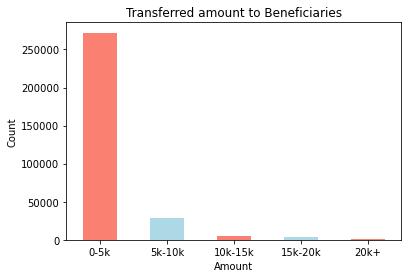

In [107]:
# Plot a graph of the trans_amt_group
df["trans_amt_group"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Transferred amount to Beneficiaries")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.xticks(rotation=0);

**Create a new category for the txn_amount column**

In [96]:
df.txn_amount.value_counts()

100.00      46042
500.00      18343
1000.00     17823
10000.00    15407
5000.00     14002
            ...  
9808.60         1
554.75          1
1493.50         1
13800.00        1
4743.59         1
Name: txn_amount, Length: 13891, dtype: int64

In [97]:
# Creating a category for txn_amount
ranges = [0, 5000, 10000, 15000, 20000, np.inf]
group_names = ["0-5k", "5k-10k", "10k-15k", "15k-20k", "20k+"]

# Create a trans_amt_group
df["amount_txn_group"] = pd.cut(df["txn_amount"], bins=ranges, labels=group_names)
df[["amount_txn_group", "txn_amount"]]

,amount_txn_group,txn_amount
351510,0-5k,50.00
351511,0-5k,50.00
351512,0-5k,50.00
348408,0-5k,50.00
351513,0-5k,10.00
...,...,...
175344,0-5k,4000.00
328582,0-5k,240.00
157858,0-5k,412.00
288452,0-5k,6.75


In [98]:
# Drop the txn_amount column
df.drop(["txn_amount"], axis=1, inplace=True)

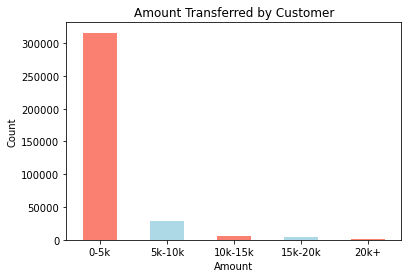

In [109]:
# Plot a graph of the amount_txn_group
df["amount_txn_group"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title("Amount Transferred by Customer")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.xticks(rotation=0);

**Create a new category for the after_ledger_balance column**

In [115]:
# Creating a category for txn_amount
ranges = [0, 5000, 10000, 15000, 20000, np.inf]
group_names = ["0-5k", "5k-10k", "10k-15k", "15k-20k", "20k+"]

# Create a trans_amt_group
df["after_ledger_balance_group"] = pd.cut(df["after_ledger_balance"], bins=ranges, labels=group_names)
df[["after_ledger_balance_group", "after_ledger_balance"]]

,after_ledger_balance_group,after_ledger_balance
351510,0-5k,120.00
351511,0-5k,170.00
351512,0-5k,70.00
348408,NaN,0.00
351513,0-5k,110.00
...,...,...
175344,NaN,0.00
328582,NaN,0.00
157858,NaN,0.00
288452,0-5k,9.75


In [116]:
# Drop the transferred_amount column
df.drop(["after_ledger_balance"], axis = 1, inplace = True)

### Fraud Transaction according to trans_amt_group

In [111]:
# Compare target column with trans_amt_group
pd.crosstab(df.target, df.trans_amt_group)

trans_amt_group,0-5k,5k-10k,10k-15k,15k-20k,20k+
target,,,,,
0,188531,14850,2545,1679,653
1,83419,13561,2731,2114,999


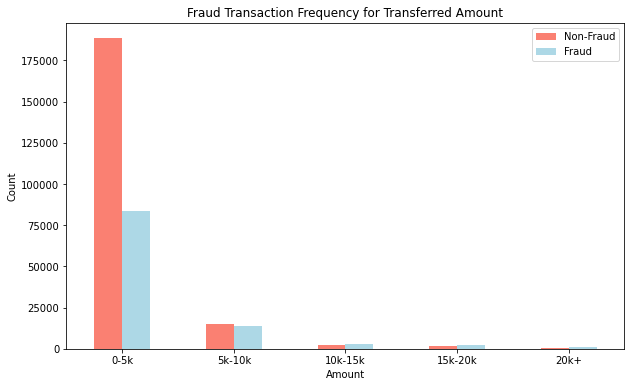

In [113]:
# Create a plot of crosstab
pd.crosstab(df.trans_amt_group, df.target).plot(kind="bar", 
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"]);

plt.title("Fraud Transaction Frequency for Transferred Amount") 
plt.xlabel("Amount") 
plt.ylabel("Count")
plt.legend(["Non-Fraud", "Fraud"])
plt.xticks(rotation=0);

In [117]:
df.head()

,username,status,kyc_status,aml_status,country,mobile_phone_number_first_digits,email_domain,ibans,referred_by,count_of_ibans,...,last_update_day,last_update_DoW,dump_year,dump_month,dump_day,dump_DoW,target,trans_amt_group,amount_txn_group,after_ledger_balance_group
351510,7.056751e+10,INACTIVE,VERIFIED,CHECKED,United Arab Emirates,971567.0,hubpay.ae,NaN,252d271228,NaN,...,29,1,2020,9,29,1,1,0-5k,0-5k,0-5k
351511,7.056751e+10,INACTIVE,VERIFIED,CHECKED,United Arab Emirates,971567.0,hubpay.ae,NaN,252d271228,NaN,...,29,1,2020,9,29,1,1,0-5k,0-5k,0-5k
351512,7.056751e+10,INACTIVE,VERIFIED,CHECKED,United Arab Emirates,971567.0,hubpay.ae,NaN,252d271228,NaN,...,29,1,2020,9,29,1,1,0-5k,0-5k,0-5k
348408,7.055597e+10,ACTIVE,PENDING,CHECKED,United Arab Emirates,971555.0,hubpay.ae,NaN,38a705d967,NaN,...,17,5,2020,10,17,5,0,0-5k,0-5k,NaN
351513,7.056751e+10,INACTIVE,VERIFIED,CHECKED,United Arab Emirates,971567.0,hubpay.ae,NaN,252d271228,NaN,...,29,1,2020,9,29,1,1,NaN,0-5k,0-5k


In [119]:
# Find the columns which contains strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

status
kyc_status
aml_status
country
email_domain
ibans
referred_by
txn_no
type
response_message
transaction_description
transaction_category
beneficiary_currency
customer_currency
transaction_purpose
transaction_destination


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355225 entries, 351510 to 77359
Data columns (total 40 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   username                          355225 non-null  float64 
 1   status                            355225 non-null  object  
 2   kyc_status                        355225 non-null  object  
 3   aml_status                        346596 non-null  object  
 4   country                           355225 non-null  object  
 5   mobile_phone_number_first_digits  355225 non-null  float64 
 6   email_domain                      355225 non-null  object  
 7   ibans                             345564 non-null  object  
 8   referred_by                       355181 non-null  object  
 9   count_of_ibans                    345564 non-null  float64 
 10  count_of_eids                     345195 non-null  float64 
 11  txn_no                            3

In [121]:
# Check missing data
df.isnull().sum()/len(df)

username                            0.000000
status                              0.000000
kyc_status                          0.000000
aml_status                          0.024292
country                             0.000000
mobile_phone_number_first_digits    0.000000
email_domain                        0.000000
ibans                               0.027197
referred_by                         0.000124
count_of_ibans                      0.027197
count_of_eids                       0.028236
txn_no                              0.000000
account_number                      0.000000
type                                0.000000
response_message                    0.000008
transaction_description             0.001028
transaction_category                0.000006
beneficiary_id                      0.114978
beneficiary_currency                0.114978
customer_currency                   0.000006
exchange_rate                       0.124268
transaction_charges                 0.124268
transactio

### Fill missing values

**Fill the numeric values first**

In [123]:
# Check for the numeric columns with missing values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

count_of_ibans
count_of_eids
beneficiary_id
exchange_rate
transaction_charges


In [124]:
# Fill the numeric rolls with median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not 
            df[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df[label] = content.fillna(content.median())
            

In [125]:
# Confirm check for the numeric columns with missing values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [126]:
# Check to see how many samples were missing
df.count_of_ibans_is_missing.value_counts()

False    345564
True       9661
Name: count_of_ibans_is_missing, dtype: int64

In [127]:
# Check for other missing values
df.isna().sum()

username                                 0
status                                   0
kyc_status                               0
aml_status                            8629
country                                  0
mobile_phone_number_first_digits         0
email_domain                             0
ibans                                 9661
referred_by                             44
count_of_ibans                           0
count_of_eids                            0
txn_no                                   0
account_number                           0
type                                     0
response_message                         3
transaction_description                365
transaction_category                     2
beneficiary_id                           0
beneficiary_currency                 40843
customer_currency                        2
exchange_rate                            0
transaction_charges                      0
transaction_purpose                  44143
transaction

**Filling and turing categorical variables into numbers**

In [129]:
# Check for columns which aren't numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

status
kyc_status
aml_status
country
email_domain
ibans
referred_by
txn_no
type
response_message
transaction_description
transaction_category
beneficiary_currency
customer_currency
transaction_purpose
transaction_destination
trans_amt_group
amount_txn_group
after_ledger_balance_group


In [130]:
# Turn categorial variables into numbers and fill missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df[label+"_is_missing"] = pd.isnull(content) #Turn categories into number and add +1 
        df[label] = pd.Categorical(content).codes+1
        

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355225 entries, 351510 to 77359
Data columns (total 64 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   username                               355225 non-null  float64
 1   status                                 355225 non-null  int8   
 2   kyc_status                             355225 non-null  int8   
 3   aml_status                             355225 non-null  int8   
 4   country                                355225 non-null  int8   
 5   mobile_phone_number_first_digits       355225 non-null  float64
 6   email_domain                           355225 non-null  int16  
 7   ibans                                  355225 non-null  int16  
 8   referred_by                            355225 non-null  int16  
 9   count_of_ibans                         355225 non-null  float64
 10  count_of_eids                          355225 non-nu

In [132]:
# Make a correlation matrix
df.corr()

,username,status,kyc_status,aml_status,country,mobile_phone_number_first_digits,email_domain,ibans,referred_by,count_of_ibans,...,response_message_is_missing,transaction_description_is_missing,transaction_category_is_missing,beneficiary_currency_is_missing,customer_currency_is_missing,transaction_purpose_is_missing,transaction_destination_is_missing,trans_amt_group_is_missing,amount_txn_group_is_missing,after_ledger_balance_group_is_missing
username,1.000000,0.032329,-0.387439,-0.426921,-0.979685,-0.707844,-0.018541,-0.123274,-0.009715,0.063233,...,-0.000299,-0.001577,-0.000244,-0.009218,-0.000244,-0.006366,-0.006366,-0.006366,NaN,-0.007784
status,0.032329,1.000000,-0.091373,0.022938,-0.032807,-0.019113,-0.010083,-0.045115,0.032105,0.288424,...,-0.000617,0.021114,-0.000504,-0.019460,-0.000504,0.004492,0.004492,0.004492,NaN,-0.027967
kyc_status,-0.387439,-0.091373,1.000000,0.288996,0.370188,0.296154,0.024016,0.080431,0.002296,-0.013772,...,-0.004995,-0.012219,-0.006333,0.006103,-0.006333,-0.000378,-0.000378,-0.000378,NaN,-0.000958
aml_status,-0.426921,0.022938,0.288996,1.000000,0.407290,0.325745,0.003559,0.069424,0.004413,0.003616,...,0.000459,0.003348,0.000374,0.009925,0.000374,0.009440,0.009440,0.009440,NaN,-0.001157
country,-0.979685,-0.032807,0.370188,0.407290,1.000000,0.573133,0.023255,0.119201,0.008732,-0.066264,...,0.000293,0.001407,0.000239,0.007592,0.000239,0.005299,0.005299,0.005299,NaN,0.008822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
transaction_purpose_is_missing,-0.006366,0.004492,-0.000378,0.009440,0.005299,0.004206,-0.065447,-0.003571,0.001693,0.025031,...,0.004778,0.085138,0.006299,0.956834,0.006299,1.000000,1.000000,1.000000,NaN,-0.363782
transaction_destination_is_missing,-0.006366,0.004492,-0.000378,0.009440,0.005299,0.004206,-0.065447,-0.003571,0.001693,0.025031,...,0.004778,0.085138,0.006299,0.956834,0.006299,1.000000,1.000000,1.000000,NaN,-0.363782
trans_amt_group_is_missing,-0.006366,0.004492,-0.000378,0.009440,0.005299,0.004206,-0.065447,-0.003571,0.001693,0.025031,...,0.004778,0.085138,0.006299,0.956834,0.006299,1.000000,1.000000,1.000000,NaN,-0.363782
amount_txn_group_is_missing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


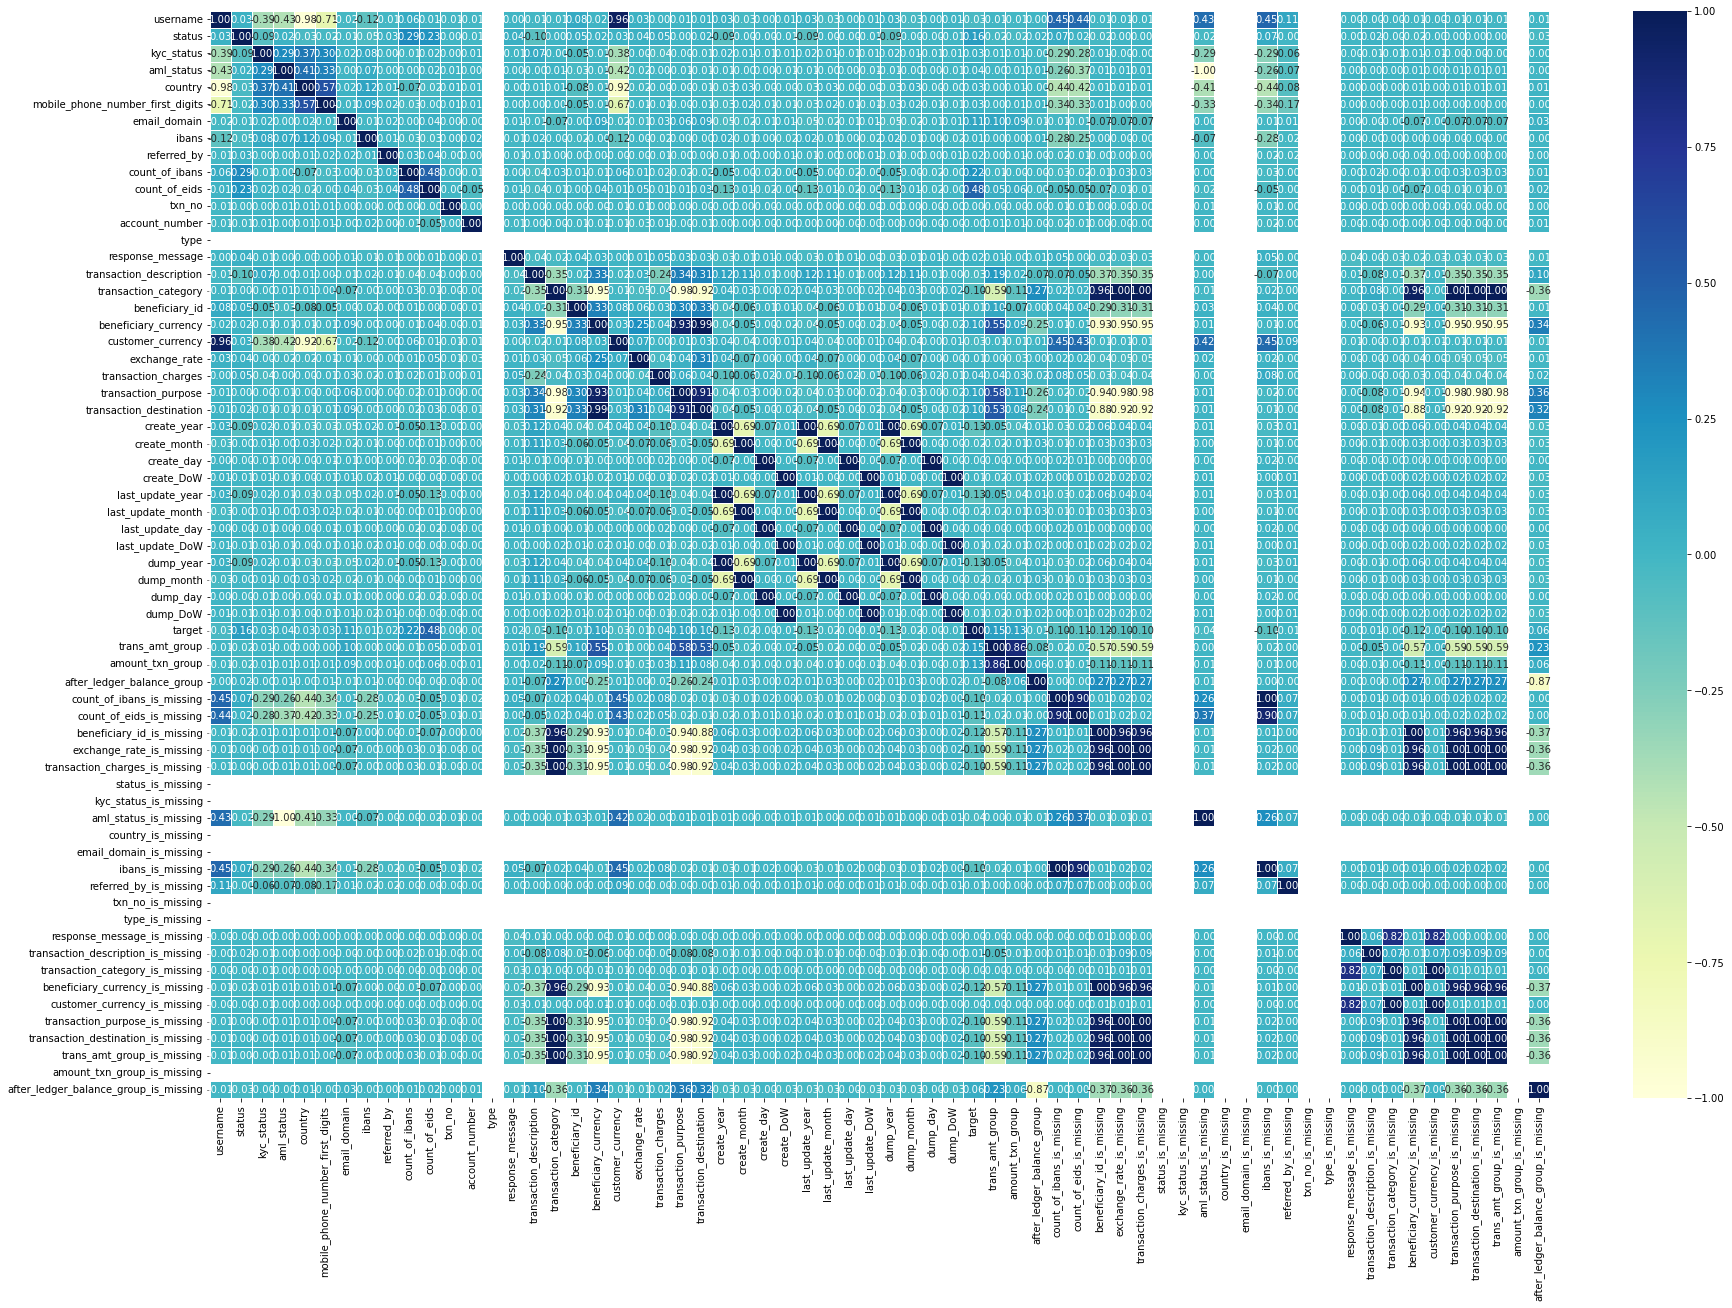

In [136]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(30, 20)) 
ax = sns.heatmap(corr_matrix,
                 annot=True, 
                 linewidths=0.5, 
                 fmt=".2f", 
                 cmap="YlGnBu");

In [138]:
# Drop some redundant columns
df.drop(["type", "status_is_missing", "kyc_status_is_missing", "country_is_missing",
         "email_domain_is_missing", "txn_no_is_missing", "type_is_missing"], 
        axis=1, inplace=True)

df

,username,status,kyc_status,aml_status,country,mobile_phone_number_first_digits,email_domain,ibans,referred_by,count_of_ibans,...,response_message_is_missing,transaction_description_is_missing,transaction_category_is_missing,beneficiary_currency_is_missing,customer_currency_is_missing,transaction_purpose_is_missing,transaction_destination_is_missing,trans_amt_group_is_missing,amount_txn_group_is_missing,after_ledger_balance_group_is_missing
351510,7.056751e+10,2,2,1,4,971567.0,135,0,4158,1.0,...,False,False,False,False,False,False,False,False,False,False
351511,7.056751e+10,2,2,1,4,971567.0,135,0,4158,1.0,...,False,False,False,False,False,False,False,False,False,False
351512,7.056751e+10,2,2,1,4,971567.0,135,0,4158,1.0,...,False,False,False,False,False,False,False,False,False,False
348408,7.055597e+10,1,1,1,4,971555.0,135,0,6362,1.0,...,False,False,False,False,False,False,False,False,False,True
351513,7.056751e+10,2,2,1,4,971567.0,135,0,4158,1.0,...,False,False,False,False,False,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175344,7.052571e+10,1,2,1,4,971525.0,103,19958,26685,1.0,...,False,False,False,False,False,False,False,False,False,True
328582,7.058815e+10,1,2,1,4,971588.0,103,13022,5814,1.0,...,False,False,False,False,False,False,False,False,False,True
157858,7.050697e+10,1,2,1,4,971506.0,103,16751,18205,1.0,...,False,False,False,False,False,False,False,False,False,True
288452,7.054309e+10,1,2,1,4,971543.0,103,29971,11482,1.0,...,False,False,False,True,False,True,True,True,False,False


In [150]:
df.corr()

,username,status,kyc_status,aml_status,country,mobile_phone_number_first_digits,email_domain,ibans,referred_by,count_of_ibans,...,referred_by_is_missing,response_message_is_missing,transaction_description_is_missing,transaction_category_is_missing,beneficiary_currency_is_missing,customer_currency_is_missing,transaction_purpose_is_missing,transaction_destination_is_missing,trans_amt_group_is_missing,after_ledger_balance_group_is_missing
username,1.000000,0.032329,-0.387439,-0.426921,-0.979685,-0.707844,-0.018541,-0.123274,-0.009715,0.063233,...,0.108311,-0.000299,-0.001577,-0.000244,-0.009218,-0.000244,-0.006366,-0.006366,-0.006366,-0.007784
status,0.032329,1.000000,-0.091373,0.022938,-0.032807,-0.019113,-0.010083,-0.045115,0.032105,0.288424,...,-0.002362,-0.000617,0.021114,-0.000504,-0.019460,-0.000504,0.004492,0.004492,0.004492,-0.027967
kyc_status,-0.387439,-0.091373,1.000000,0.288996,0.370188,0.296154,0.024016,0.080431,0.002296,-0.013772,...,-0.061426,-0.004995,-0.012219,-0.006333,0.006103,-0.006333,-0.000378,-0.000378,-0.000378,-0.000958
aml_status,-0.426921,0.022938,0.288996,1.000000,0.407290,0.325745,0.003559,0.069424,0.004413,0.003616,...,-0.070540,0.000459,0.003348,0.000374,0.009925,0.000374,0.009440,0.009440,0.009440,-0.001157
country,-0.979685,-0.032807,0.370188,0.407290,1.000000,0.573133,0.023255,0.119201,0.008732,-0.066264,...,-0.084844,0.000293,0.001407,0.000239,0.007592,0.000239,0.005299,0.005299,0.005299,0.008822
mobile_phone_number_first_digits,-0.707844,-0.019113,0.296154,0.325745,0.573133,1.000000,-0.007561,0.091348,0.018424,-0.033959,...,-0.174904,0.000216,0.001424,0.000176,0.008267,0.000176,0.004206,0.004206,0.004206,-0.004521
email_domain,-0.018541,-0.010083,0.024016,0.003559,0.023255,-0.007561,1.000000,-0.010209,0.018993,0.002440,...,0.009003,0.002358,-0.001942,-0.000822,-0.066658,-0.000822,-0.065447,-0.065447,-0.065447,0.032169
ibans,-0.123274,-0.045115,0.080431,0.069424,0.119201,0.091348,-0.010209,1.000000,0.005180,-0.025168,...,-0.018379,0.001484,-0.004725,0.001679,0.002769,0.001679,-0.003571,-0.003571,-0.003571,-0.002840
referred_by,-0.009715,0.032105,0.002296,0.004413,0.008732,0.018424,0.018993,0.005180,1.000000,0.028504,...,-0.019267,0.000461,0.004517,-0.000334,-0.004057,-0.000334,0.001693,0.001693,0.001693,0.004029
count_of_ibans,0.063233,0.288424,-0.013772,0.003616,-0.066264,-0.033959,0.002440,-0.025168,0.028504,1.000000,...,-0.001685,-0.000440,0.022594,-0.000359,-0.014562,-0.000359,0.025031,0.025031,0.025031,0.005257


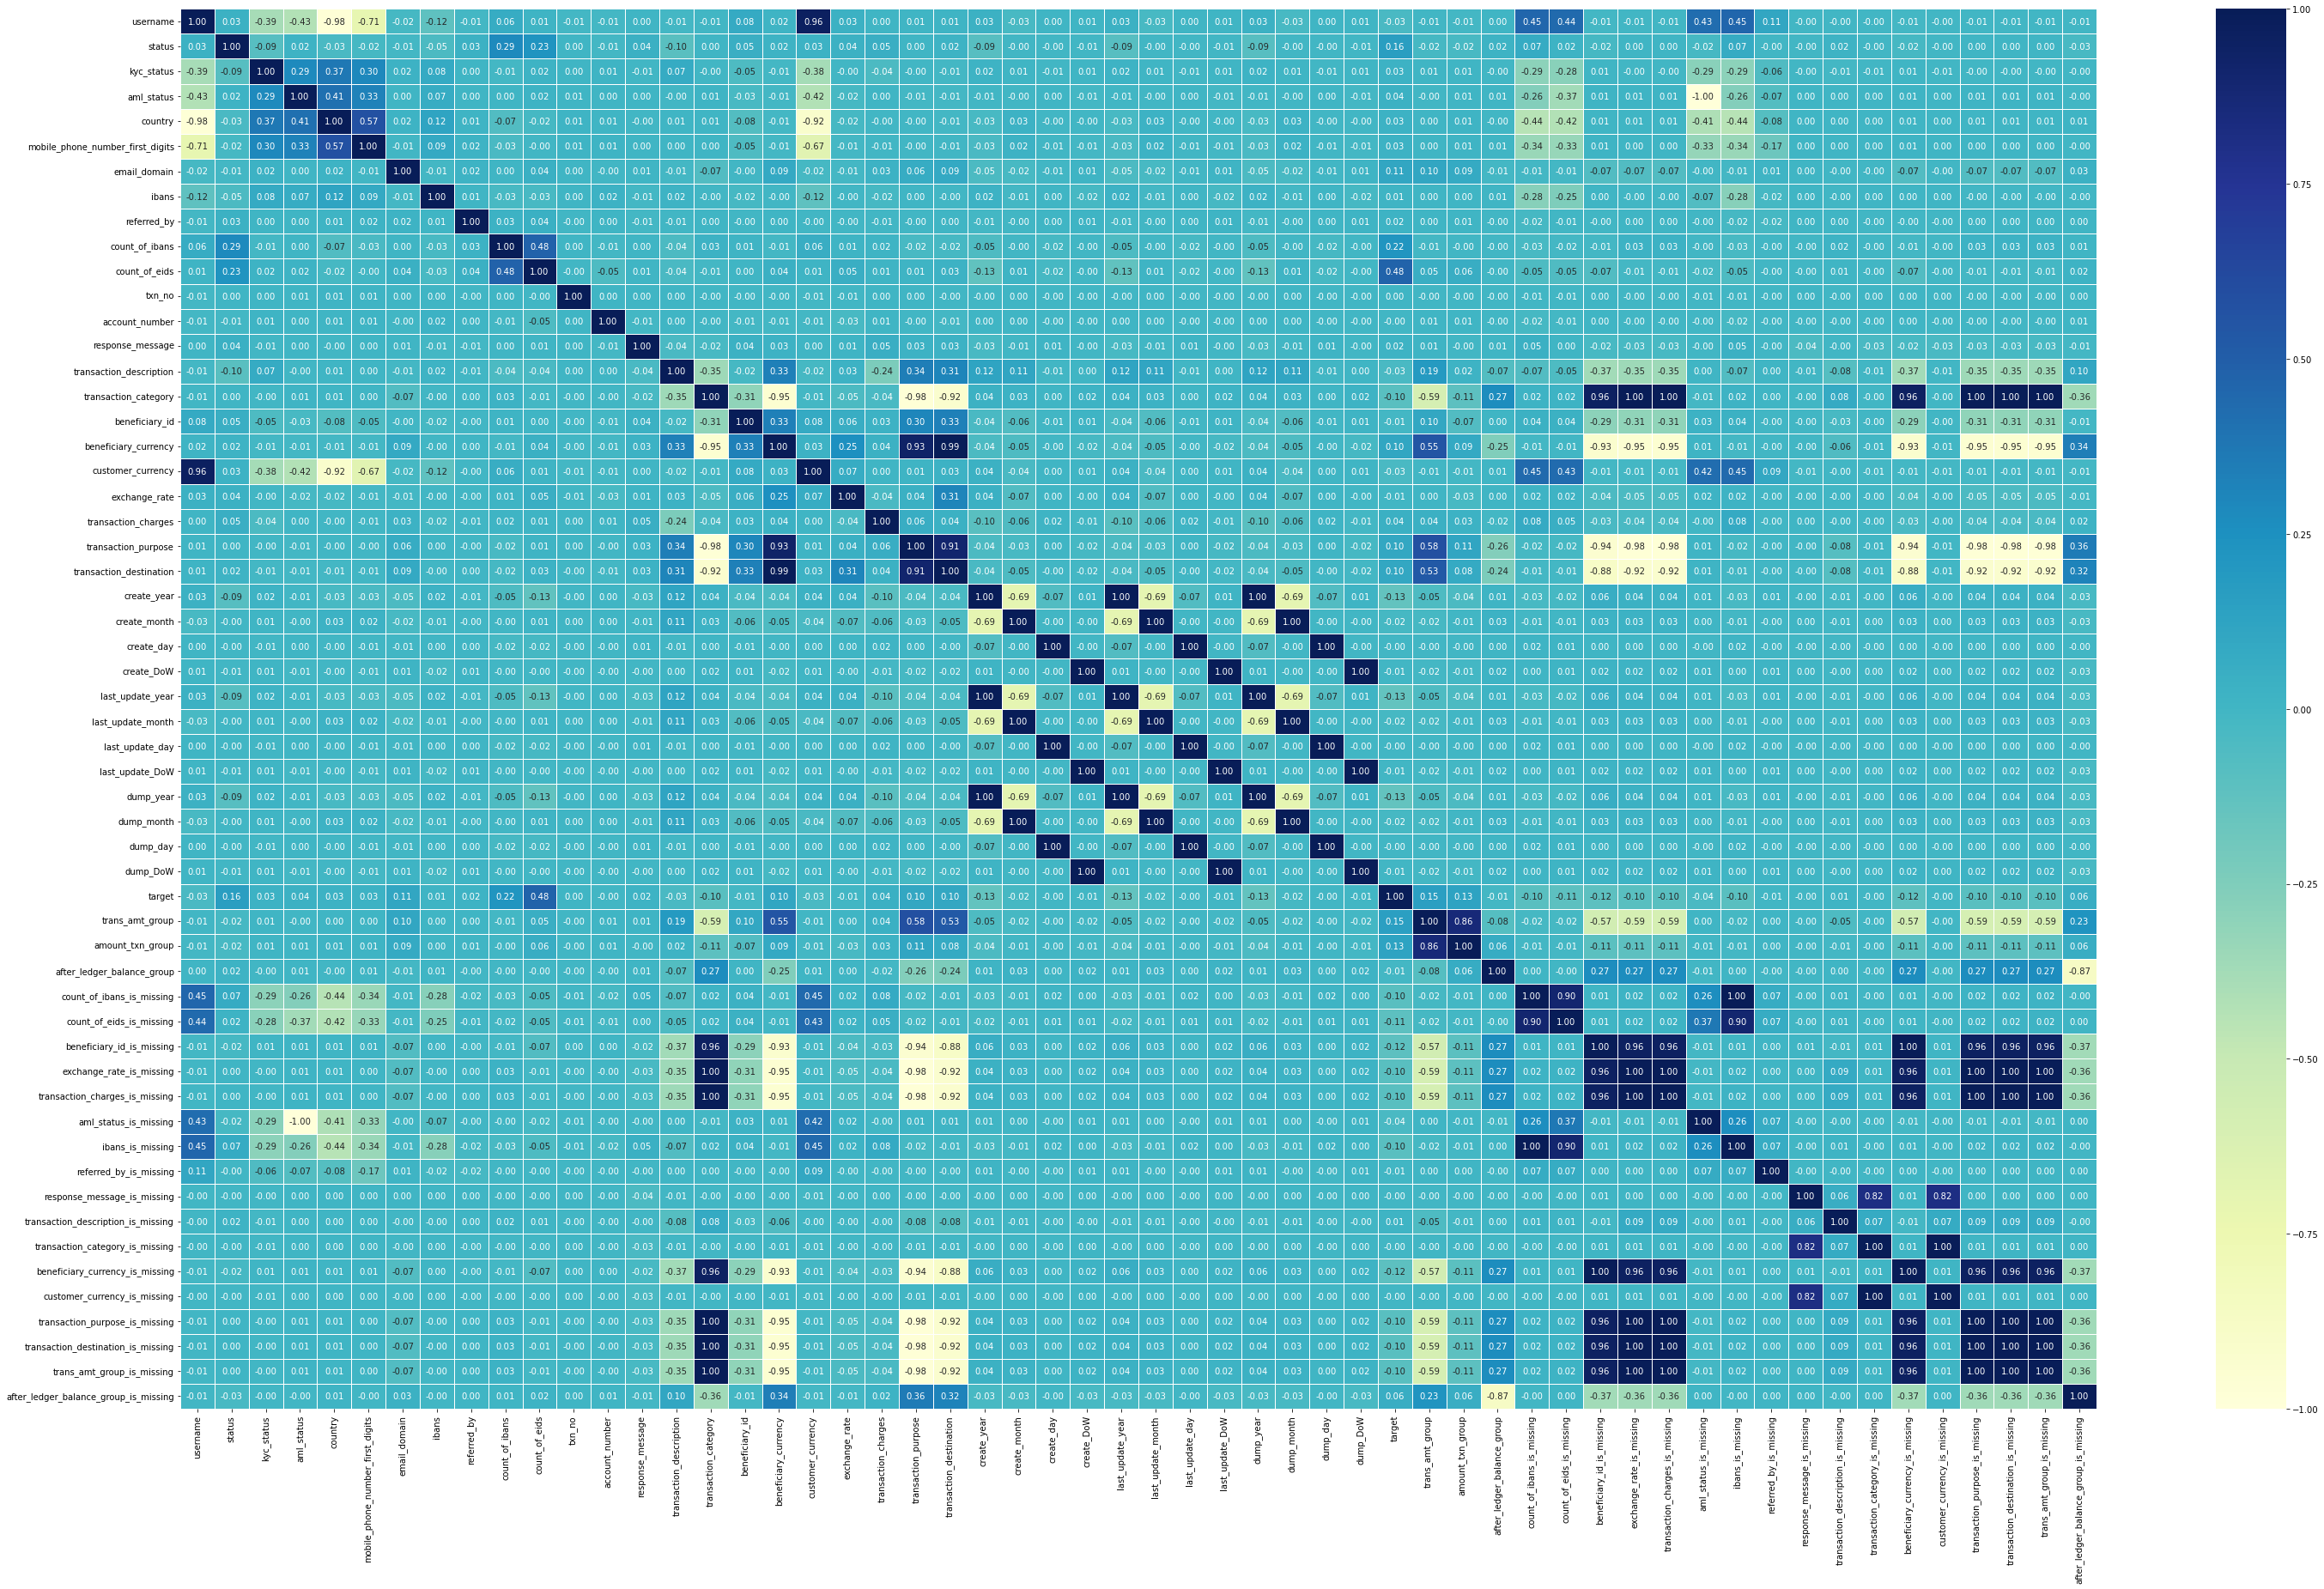

In [152]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(50, 30)) 
ax = sns.heatmap(corr_matrix,
                 annot=True, 
                 linewidths=0.5, 
                 fmt=".2f", 
                 cmap="YlGnBu");

In [154]:
# Export the model ready dataframe
df.to_csv("data/df_model_ready.csv")

## 5. Modelling

In [153]:
df.head()

,username,status,kyc_status,aml_status,country,mobile_phone_number_first_digits,email_domain,ibans,referred_by,count_of_ibans,...,referred_by_is_missing,response_message_is_missing,transaction_description_is_missing,transaction_category_is_missing,beneficiary_currency_is_missing,customer_currency_is_missing,transaction_purpose_is_missing,transaction_destination_is_missing,trans_amt_group_is_missing,after_ledger_balance_group_is_missing
351510,7.056751e+10,2,2,1,4,971567.0,135,0,4158,1.0,...,False,False,False,False,False,False,False,False,False,False
351511,7.056751e+10,2,2,1,4,971567.0,135,0,4158,1.0,...,False,False,False,False,False,False,False,False,False,False
351512,7.056751e+10,2,2,1,4,971567.0,135,0,4158,1.0,...,False,False,False,False,False,False,False,False,False,False
348408,7.055597e+10,1,1,1,4,971555.0,135,0,6362,1.0,...,False,False,False,False,False,False,False,False,False,True
351513,7.056751e+10,2,2,1,4,971567.0,135,0,4158,1.0,...,False,False,False,False,False,False,True,True,True,False


In [155]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df.target

In [156]:
X

,username,status,kyc_status,aml_status,country,mobile_phone_number_first_digits,email_domain,ibans,referred_by,count_of_ibans,...,referred_by_is_missing,response_message_is_missing,transaction_description_is_missing,transaction_category_is_missing,beneficiary_currency_is_missing,customer_currency_is_missing,transaction_purpose_is_missing,transaction_destination_is_missing,trans_amt_group_is_missing,after_ledger_balance_group_is_missing
351510,7.056751e+10,2,2,1,4,971567.0,135,0,4158,1.0,...,False,False,False,False,False,False,False,False,False,False
351511,7.056751e+10,2,2,1,4,971567.0,135,0,4158,1.0,...,False,False,False,False,False,False,False,False,False,False
351512,7.056751e+10,2,2,1,4,971567.0,135,0,4158,1.0,...,False,False,False,False,False,False,False,False,False,False
348408,7.055597e+10,1,1,1,4,971555.0,135,0,6362,1.0,...,False,False,False,False,False,False,False,False,False,True
351513,7.056751e+10,2,2,1,4,971567.0,135,0,4158,1.0,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175344,7.052571e+10,1,2,1,4,971525.0,103,19958,26685,1.0,...,False,False,False,False,False,False,False,False,False,True
328582,7.058815e+10,1,2,1,4,971588.0,103,13022,5814,1.0,...,False,False,False,False,False,False,False,False,False,True
157858,7.050697e+10,1,2,1,4,971506.0,103,16751,18205,1.0,...,False,False,False,False,False,False,False,False,False,True
288452,7.054309e+10,1,2,1,4,971543.0,103,29971,11482,1.0,...,False,False,False,False,True,False,True,True,True,False


In [157]:
y

351510    1
351511    1
351512    1
348408    0
351513    1
         ..
175344    0
328582    0
157858    0
288452    0
77359     0
Name: target, Length: 355225, dtype: int64

In [158]:
# Split data into train and test sets
#Set random seed
np.random.seed(42)

# Spilt into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [159]:
X_train

,username,status,kyc_status,aml_status,country,mobile_phone_number_first_digits,email_domain,ibans,referred_by,count_of_ibans,...,referred_by_is_missing,response_message_is_missing,transaction_description_is_missing,transaction_category_is_missing,beneficiary_currency_is_missing,customer_currency_is_missing,transaction_purpose_is_missing,transaction_destination_is_missing,trans_amt_group_is_missing,after_ledger_balance_group_is_missing
354117,7.056289e+10,1,2,1,4,971562.0,103,0,10218,1.0,...,False,False,False,False,False,False,False,False,False,True
45817,7.056245e+10,1,2,1,4,971562.0,103,1283,19076,1.0,...,False,False,False,False,False,False,False,False,False,True
167833,7.056916e+10,1,2,1,4,971569.0,103,17981,22777,1.0,...,False,False,False,False,False,False,False,False,False,True
51304,7.055531e+10,1,2,1,4,971555.0,228,18136,5583,1.0,...,False,False,False,False,False,False,False,False,False,False
143793,7.056463e+10,1,2,1,4,971564.0,225,3274,720,1.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174086,7.050933e+10,1,2,1,4,971509.0,103,16163,9328,1.0,...,False,False,False,False,False,False,False,False,False,False
140270,7.056208e+10,1,2,1,4,971562.0,188,24127,2002,1.0,...,False,False,False,False,False,False,False,False,False,True
282156,7.058989e+10,2,2,1,4,971589.0,103,6748,15067,1.0,...,False,False,False,False,False,False,False,False,False,False
87944,7.050961e+10,1,2,1,4,971509.0,103,10254,27928,1.0,...,False,False,False,False,False,False,False,False,False,False


In [160]:
y_train, len(y_train)

(354117    0
 45817     0
 167833    0
 51304     1
 143793    0
          ..
 174086    1
 140270    0
 282156    0
 87944     0
 336392    0
 Name: target, Length: 284180, dtype: int64,
 284180)

Now we've got our data split into training and test set, it's time to build a machine learning model. We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We are going to try 3 machine learning models:

1. Logistic Regression
2. Random Forest Classifier
3. K-Nearest Neighbor Classifier

In [163]:
# Put model in dictionary
models = {"Logistic Regression": LogisticRegression(), 
          "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models : a dict of different Scikit-Learn machine learning models 
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep train and model scores
    train_scores = {}
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        #Evaluate the train score and append its score to the train_scores
        train_scores[name] = model.score(X_train, y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores


In [165]:
%%time
model_scores = fit_and_score(models=models, 
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
                             
model_scores

CPU times: user 7min 18s, sys: 3.65 s, total: 7min 22s
Wall time: 1min 37s


{'Logistic Regression': 0.6844394397916813,
 'KNN': 0.9491730593285945,
 'Random Forest': 1.0}

### Model Comparism

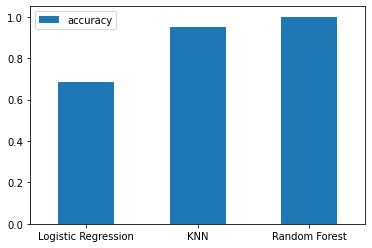

In [166]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

Now we've got a baseline model... and we know a model's first predictions aren't always what we should base our next steps off. What should we do?

Let's look at the following:

* Hyperparameter tuning 
* Feature importance 
* Confusion matrix 
* Cross-validation Precision
* Recall
* F1 Score
* Classsification report
* ROC curve
* Area under the curve (AUC)


### Hyperparameter tuning (by hand)

In [168]:
%%time
### Hyperparameter tuning (by hand)

train_scores = [] 
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) 

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

CPU times: user 11h 55min, sys: 3min 11s, total: 11h 58min 11s
Wall time: 1h 38min 25s


In [169]:
train_scores

[0.9996375536631712,
 0.9941515940601028,
 0.9849848687451616,
 0.9756633119853614,
 0.9667780983883454,
 0.9617073685692167,
 0.953480188612851,
 0.947322119783236,
 0.94003800408192,
 0.9362200014075586,
 0.9286121472306285,
 0.9238475614047434,
 0.9164825110845239,
 0.9132873530860722,
 0.9067316489548878,
 0.9032303469631924,
 0.8969315222746147,
 0.8933668801463861,
 0.8871630656626082,
 0.8844535153775775]

In [170]:
test_scores

[0.9821943838412274,
 0.9715673164895489,
 0.9613343655429657,
 0.9584207192624393,
 0.9491730593285945,
 0.9434724470406081,
 0.934421845309311,
 0.9314096699275107,
 0.9234569638961222,
 0.9197269336336125,
 0.9116193961573651,
 0.9075937785910339,
 0.8998522063480893,
 0.8969244844816665,
 0.8910831163347175,
 0.8881553944682947,
 0.881849531986769,
 0.8786684495742135,
 0.8725737208811317,
 0.8700541910057006]

Maximum KNN score on the test data: 98.22%


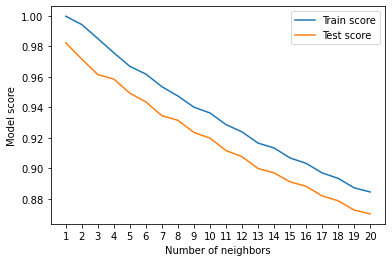

In [172]:
plt.plot(neighbors, train_scores, label="Train score") 
plt.plot(neighbors, test_scores, label="Test score") 
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [173]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4, 20), 
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

**Tune LogisticRegression**

In [185]:
%%time
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for ZLogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 3min 56s, sys: 28.1 s, total: 4min 24s
Wall time: 3min 29s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [186]:
# Find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [187]:
rs_log_reg.score(X_test, y_test)

0.6844394397916813

Now we've tuned the LogisticRegression(), let's do the same for RandomForestClassifier()

**Tune RandomForestClassifier**

In [180]:
%%time
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5, 
                           n_iter=20, 
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 2h 16min 5s, sys: 2min 5s, total: 2h 18min 11s
Wall time: 2h 19min 5s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [181]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [182]:
rs_rf.score(X_test, y_test)

1.0

### Hyperparameter tunning with GridSearchCV

In [188]:
%%time
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), 
                          param_grid=log_reg_grid,
                          cv=5, 
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: user 5min 45s, sys: 40 s, total: 6min 25s
Wall time: 5min


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [189]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.0001, 'solver': 'liblinear'}

In [190]:
# Evaluate the grid search LogisticRegression Model
gs_log_reg.score(X_test, y_test)

0.6844394397916813

### Evaluating our tuned machine learning classifier, beyound accuracy

* ROC curve and AUC score 
* Confusion matrix 
* Classification report 
* Precision
* Recall 
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [191]:
# Make predictions with tuned model
y_preds = rs_rf.predict(X_test)

In [192]:
y_preds

array([0, 0, 0, ..., 0, 0, 0])

**ROC curve and AUC score**

/Users/ken/Desktop/msc_capstone/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


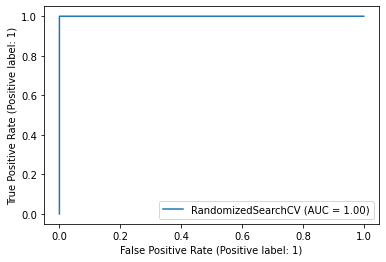

In [193]:
# Plot ROC curve and calculate the AUC metric
plot_roc_curve(rs_rf, X_test, y_test);

**Confusion Matrix**

In [194]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[48626     0]
 [    0 22419]]


In [201]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seanorn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis

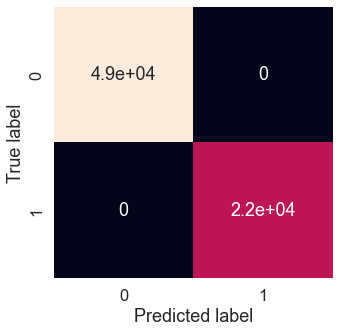

In [202]:
plot_conf_mat(y_test=y_test, 
              y_preds=y_preds)

Explanation

From the confusion matrix plot;

* 48626 True Negatives
* 22419 True Positives
* 0 False Negatives
* 0 False Positives

**Classification report**

In [203]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48626
           1       1.00      1.00      1.00     22419

    accuracy                           1.00     71045
   macro avg       1.00      1.00      1.00     71045
weighted avg       1.00      1.00      1.00     71045



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [204]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [205]:
%%time
# Create a new classifier with the best parameters
clf = RandomForestClassifier(n_estimators=710,
                            min_samples_split=16,
                            min_samples_leaf=3,
                            max_depth=10)

In [206]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")

cv_acc = np.mean(cv_acc)
cv_acc

1.0

In [207]:
%%time
# Cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

CPU times: user 15min 22s, sys: 13.7 s, total: 15min 36s
Wall time: 15min 42s


1.0

In [208]:
%%time
# Cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

CPU times: user 15min 13s, sys: 13.6 s, total: 15min 27s
Wall time: 15min 33s


1.0

In [209]:
%%time
# Cross-validated accuracy
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

CPU times: user 15min 21s, sys: 13.6 s, total: 15min 35s
Wall time: 15min 42s


1.0

CPU times: user 32.9 ms, sys: 4.97 ms, total: 37.9 ms
Wall time: 36.4 ms


<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

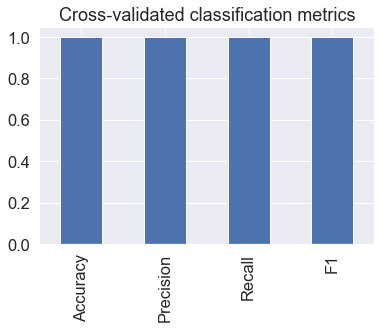

In [211]:
%%time
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0]);

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False);

## Feature Importance

Feature importance is another way of asking, "which features contributed most to the outcome of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

Let's find the feature importance for our LogiticRegression model...

In [212]:
# Fit an instance of RandomForestClassifier()
clf = RandomForestClassifier(n_estimators=710,
                            min_samples_split=16,
                            min_samples_leaf=3,
                            max_depth=10)

clf.fit(X_train, y_train);

In [215]:
# Check coef_
clf.feature_importances_

array([3.26768235e-03, 1.23538836e-02, 1.50761678e-04, 1.04762703e-04,
       5.83516877e-05, 2.34551213e-03, 8.21855469e-03, 3.45801604e-03,
       2.32634614e-03, 9.53889848e-02, 7.97027361e-01, 1.05955571e-04,
       2.89412853e-03, 4.67850470e-05, 2.76877381e-03, 5.44098896e-04,
       1.75213695e-03, 3.19217124e-03, 8.97506407e-05, 9.53571249e-04,
       3.18520236e-05, 6.91304958e-04, 5.92343738e-04, 4.36400441e-03,
       3.61728331e-03, 1.59973878e-03, 6.65122161e-04, 3.96101369e-03,
       3.12903656e-03, 1.69414002e-03, 7.44939575e-04, 4.77486995e-03,
       3.24797460e-03, 1.64922264e-03, 7.07984149e-04, 7.26543589e-03,
       8.14441599e-03, 8.36363763e-04, 1.83173092e-03, 4.37913510e-03,
       2.74133430e-03, 4.01284406e-04, 2.98574307e-04, 1.01162170e-04,
       1.66779414e-03, 2.32607833e-12, 0.00000000e+00, 3.76330914e-06,
       0.00000000e+00, 2.41562402e-03, 0.00000000e+00, 4.98739268e-04,
       4.08181782e-04, 3.46125919e-04, 1.41915646e-04])

In [217]:
# Match coef_'s of features to columns
feature_dict = dict(zip(df.columns, list(clf.feature_importances_)))
feature_dict

{'username': 0.003267682352094449,
 'status': 0.012353883644768023,
 'kyc_status': 0.00015076167792230975,
 'aml_status': 0.0001047627030527454,
 'country': 5.835168773862746e-05,
 'mobile_phone_number_first_digits': 0.0023455121325633246,
 'email_domain': 0.008218554692449654,
 'ibans': 0.0034580160424756983,
 'referred_by': 0.0023263461440270953,
 'count_of_ibans': 0.09538898476400542,
 'count_of_eids': 0.7970273607204693,
 'txn_no': 0.00010595557073889555,
 'account_number': 0.0028941285295619157,
 'response_message': 4.678504698239527e-05,
 'transaction_description': 0.0027687738140016044,
 'transaction_category': 0.0005440988961306359,
 'beneficiary_id': 0.0017521369537658025,
 'beneficiary_currency': 0.003192171237866785,
 'customer_currency': 8.975064072377887e-05,
 'exchange_rate': 0.0009535712491542081,
 'transaction_charges': 3.185202359436731e-05,
 'transaction_purpose': 0.0006913049575204051,
 'transaction_destination': 0.0005923437376447402,
 'create_year': 0.0043640044148

In [224]:
# Visualize features importance
perm_importance = permutation_importance(rf, X_test, y_test)
# To plot the importance
sorted_idx = perm_importance.importances_mean.argsort()
# plt.barh(boston.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
# plt.xlabel("Permutation Importance")

NameError: name 'permutation_importance' is not defined

# 6. Further Research Experimentation

We did achieve our evaluation metric with an accuracy score of 1.0

However, it would be nice to look into the following:

* Spliting the dataset into train and test, before filling the missing values
* Drop the rolls with missing values
* Apply RUS Boost and SMOTE Boost

## a. Spliting the dataset into train and test, before filling the missing values

We are going to do the following the df dataset:

* Write the function to treat the df dataset
    * Split df into train and test,
    * Export the train and test set,
    * Import the train set,
    * Write a function to fill missing values and convert columns to number
        * Fill missing values in the train set
        * Convert the columns to numbers
        *  Run the model
    * Import the test set
    * Call the function to fill missing values and convert columns to number
        * Fill missing values in the test set
        * Convert the columns to numbers
        * Run model prediction